In [8]:
import cv2
import matplotlib.pyplot as plt
import zipfile

cv2.__version__

'4.11.0'

# **conectar com o drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Descompactando as imagems que utlizaremos

In [10]:
caminhoPose = '/content/drive/MyDrive/projetinhos/libras/pose.zip'
descompactando = zipfile.ZipFile(file = caminhoPose, mode = 'r')
descompactando.extractall('./')

In [11]:
caminhoImg = '/content/drive/MyDrive/projetinhos/libras/imagens.zip'
descompactando = zipfile.ZipFile(file = caminhoImg, mode = 'r')
descompactando.extractall('./')
descompactando.close()

carregando modelos e estruturas das redes neurais pre-treinadas

In [12]:
arqProto = '/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arqPesos = '/content/pose/body/mpi/pose_iter_160000.caffemodel'

carregar imgs do drive

In [15]:
img = cv2.imread('/content/imagens/body/multiple/multiple_1.jpeg')
img.shape

(640, 640, 3)

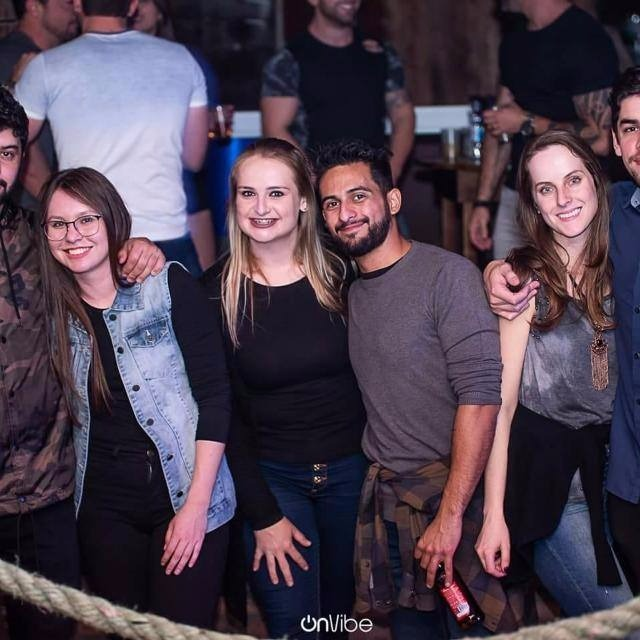

In [16]:
#cv_imshow #isso mostraria a img, mas o colab nao permite usar essa funcao, pergunte a deus o pq. ou quem criou o coleb, tbm resolve
from google.colab.patches import cv2_imshow #fazendo a funcao funfa
cv2_imshow(img)

In [19]:
imgW = img.shape[1]
imgH = img.shape[0]
imgW, imgH

(640, 640)

In [20]:
modelo = cv2.dnn.readNetFromCaffe(arqProto, arqPesos) ##pode usar o tensorflow, torch

maior dimensao / mais lento o carregmento / accuracy

In [22]:
entradaH = 368
entradaW = int((entradaH / imgH) * imgW)

In [23]:
entradaH, entradaW

(368, 368)

In [27]:
bloblEantrada = cv2.dnn.blobFromImage(image = img, scalefactor= 1.0 / 255,
                                      size = (entradaW, entradaH),
                                      mean = (0,0,0), swapRB = True, crop = False)
#crop previne que a img nao seja cortada caso o tamanho seja muito maior do que o solicitado apra treinamento
#swapRb previne algo dos tons vermlhos/branco do rgb

In [28]:
modelo.setInput(bloblEantrada)
saida = modelo.forward() #retorna uma matriz 4d

In [29]:
saida.shape

(1, 44, 46, 46)

In [30]:
pontoDesejado = 4 #pulso
mapaConfianca = saida[0, pontoDesejado, :, :]
mapaConfianca = cv2.resize(mapaConfianca, (imgW, imgH))

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

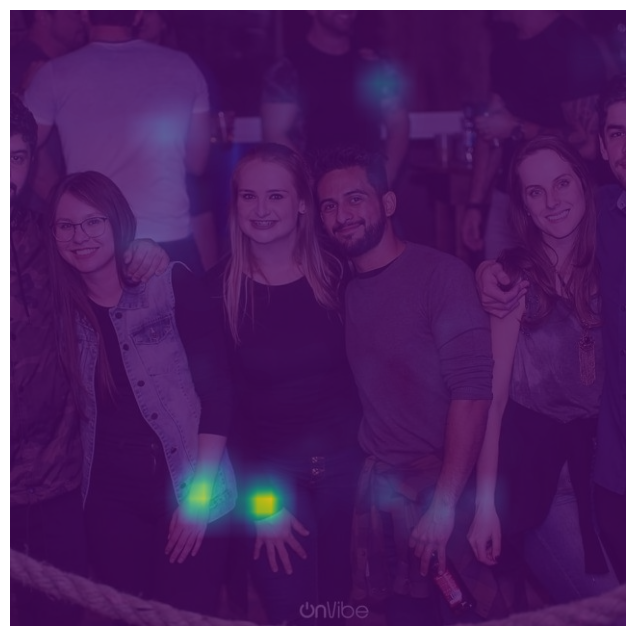

In [33]:
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #CONVERSAO DE CORES DA IMG
plt.imshow(mapaConfianca, alpha = 0.8)
plt.axis('off')